## 1st 'a solution'

In [9]:
from scipy import stats
import pandas as pd
from scipy.stats import ttest_1samp
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('fitbit_data.csv')
df.head(1)
X=list(df['calories'])
m=np.mean(X)
print(m)
tset, pval = ttest_1samp(X,20)
print("p-values",pval)
if pval < 0.05:
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

19.471823374275477
p-values 0.12589666194467458
we are accepting null hypothesis


## 1st 'b solution'

In [11]:
df_chi = pd.read_csv('fitbit_data.csv')
contingency_table=pd.crosstab(df_chi["gender"],df_chi["calories"])
print('contingency_table :-\n',contingency_table)
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 calories  0.056269   0.058560   0.061000   0.061100   0.061125   0.061130   \
gender                                                                       
0                 1          2        104          0          7          1   
1                 0          0         10          1          2          0   

calories  0.061158   0.061208   0.061217   0.061250   ...  89.000000  \
gender                                                ...              
0                 0          4          2          2  ...         19   
1                 1          1          0          0  ...          8   

calories  90.000000  90.500000  91.500000  92.500000  93.500000  94.500000  \
gender                                                                       
0                 8         12          8         17          3         11   
1                 2          3          5          6          6         10   

calories  95.500000  96.500000  97.500000  
gender             

## 2nd

In [12]:
from math import *
from decimal import Decimal
def p_root(value, root):
    root_value = 1 / float(root)
    return round (Decimal(value) **
             Decimal(root_value), 3)
def minkowski_distance(x, y, p_value):
    return (p_root(sum(pow(abs(a-b), p_value)
            for a, b in zip(x, y)), p_value))
v1 = [31,8.2,0,802,206]
v2 = [18.58,1.53,4.08,26,108]
v3 = [41.1,25.56,0,120,406]
v4 = [25.34,10.35,99.4,0,584]
v5 = [6.2,0.3,17.9,0,584]
v6 = [34.64,1.86,0,132,165]
v7 = [40.94,22.52,0,135,378]
p = 3
print("Salmon/Cottage cheese",minkowski_distance(v1, v2, p))
print("Cottage cheese/Pork",minkowski_distance(v2, v3, p))
print("Pork/Oats",minkowski_distance(v3, v4, p))
print("Oats/Baked Beans",minkowski_distance(v4, v5, p))
print("Baked Beans/Chicken",minkowski_distance(v5, v6, p))
print("Chicken/Beef",minkowski_distance(v6, v7, p))

Salmon/Cottage cheese 776.522
Cottage cheese/Pork 301.179
Pork/Oats 202.934
Oats/Baked Beans 81.901
Baked Beans/Chicken 423.376
Chicken/Beef 213.067


## 3rd

In [13]:
import pandas as pd
import scipy.stats
df = pd.read_csv('fitbit_data.csv')
matrix=df.corr()
print(matrix)
df.corr(method='pearson')
k=scipy.stats.pearsonr(df['calories'], df['distance'])
print('Pearson Correlation',k)

                      Unnamed: 0        X1       age    gender    height  \
Unnamed: 0              1.000000  0.449037  0.126539 -0.225263 -0.204343   
X1                      0.449037  1.000000  0.299608 -0.465047 -0.369403   
age                     0.126539  0.299608  1.000000 -0.236032 -0.518798   
gender                 -0.225263 -0.465047 -0.236032  1.000000  0.735852   
height                 -0.204343 -0.369403 -0.518798  0.735852  1.000000   
weight                 -0.206349 -0.262244 -0.152317  0.580446  0.693504   
steps                  -0.252668  0.138594  0.006394 -0.069719  0.025729   
hear_rate              -0.067211  0.181164 -0.007665 -0.093476 -0.123519   
calories                0.447055 -0.156275 -0.064661  0.071875  0.034447   
distance                0.335736  0.055878 -0.061169 -0.051779 -0.091422   
entropy_heart          -0.159582 -0.067306 -0.002541 -0.051111 -0.069491   
entropy_setps          -0.326790 -0.138498 -0.001528  0.014608  0.049100   
resting_hear

## 4th

[[44.18181818 17.27272727]
 [52.81818182 43.09090909]
 [30.625      58.5       ]]


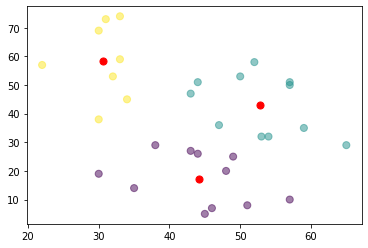

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
Data = {'x': [30,44,32,30,33,33,31,22,30,34,57,54,57,43,50,47,59,52,65,57,49,48,35,53,44,45,38,43,51,46],
        'y': [19,51,53,38,59,74,73,57,69,45,51,32,10,47,53,36,35,58,29,50,25,20,14,32,26,5,29,27,8,7]
       } 
df = DataFrame(Data,columns=['x','y'])  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()